In [20]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
import os ,sys
ROOT = os.getcwd()
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

In [17]:
import yaml
def read_cfg(cfg_file):
    """
    Read configurations from yaml file
    Args:
        cfg_file (.yaml): path to cfg yaml
    Returns:
        (dict): configuration in dict
    """
    with open(cfg_file, 'r') as rf:
        cfg = yaml.safe_load(rf)
        return cfg
cfg = read_cfg(cfg_file='/home/air/Spoof/patch_light/config/config.yaml')

In [18]:
orig_img = Image.open(Path('/home/air/Spoof/Implementation-patchnet/images/LCC_FASD/LCC_FASD_development/spoof/FT720P_G780_REDMI4X_id0_s0_15.png'))


In [23]:
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open(Path('/home/air/Spoof/Implementation-patchnet/images/LCC_FASD/LCC_FASD_development/spoof/FT720P_G780_REDMI4X_id0_s0_15.png'))
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

TypeError: Image data of dtype object cannot be converted to float

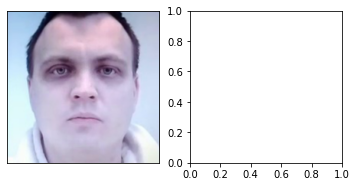

In [25]:
padded_imgs = [T.Compose([
    T.Resize(cfg['model']['image_size']),
    T.RandomCrop(cfg['dataset']['augmentation']['rand_crop_size']),
    T.ToTensor(),
    T.Normalize(cfg['dataset']['mean'], cfg['dataset']['sigma'])
])]
plot(padded_imgs)

In [34]:
import torch
import torchvision.transforms as transforms
import torchvision.utils as vutils
from PIL import Image

# Load an example image
img = Image.open(Path(
    '/home/air/Spoof/Implementation-patchnet/images/LCC_FASD/LCC_FASD_development/spoof/FT720P_G780_REDMI4X_id0_s0_15.png'))

# Define the transforms
transform = transforms.Compose([
    transforms.Resize(cfg['model']['image_size']),
    transforms.RandomCrop(cfg['dataset']['augmentation']['rand_crop_size']),
    transforms.RandomHorizontalFlip(
        cfg['dataset']['augmentation']['rand_hori_flip']),
    transforms.RandomRotation(cfg['dataset']['augmentation']['rand_rotation']),
    transforms.ToTensor(),
    transforms.Normalize(cfg['dataset']['mean'], cfg['dataset']['sigma'])
])

# Apply the transforms to the image
img_transformed = transform(img)

# Resize the original image to the same size as the transformed image
resize = T.Resize(img_transformed.shape[-2:])
img_resized = resize(img)

# Create a grid of images before and after applying the transforms
grid = vutils.make_grid(torch.stack(
    [T.ToTensor()(img_resized), img_transformed]), nrow=2)

# Display the grid
vutils.save_image(grid, 'transforms-train.jpg')

In [ ]:
import cv2
import matplotlib.pyplot as plt
from Load_FAS_MultiModal_DropModal import Load_FAS_MultiModal_DropModal

# Create an instance of the dataset class
dataset = Load_FAS_MultiModal_DropModal(data_dir='/path/to/data')

# Get a single image from the dataset
image_path = '/path/to/image.jpg'
image = dataset.get_single_image_x(image_path)

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.show()

In [35]:
import imgaug.augmenters as iaa

seq = iaa.Sequential([
    iaa.Add(value=(-40,40), per_channel=True), # Add color 
    iaa.GammaContrast(gamma=(0.5,1.5)) # GammaContrast with a gamma of 0.5 to 1.5
])


In [37]:
def get_single_image_x_RGB( image_path):
    
    image_x = np.zeros((224, 224, 3))
    binary_mask = np.zeros((28, 28))
    # RGB
    image_x_temp = cv2.imread(image_path)
    
    #cv2.imwrite('temp.jpg', image_x_temp)

    image_x = cv2.resize(image_x_temp, (224, 224))
    
    # data augment from 'imgaug' --> Add (value=(-40,40), per_channel=True), GammaContrast (gamma=(0.5,1.5))
    image_x_aug = seq.augment_image(image_x) 
    
    image_x_temp_gray = cv2.imread(image_path, 0)
    image_x_temp_gray = cv2.resize(image_x_temp_gray, (28, 28))
    for i in range(28):
        for j in range(28):
            if image_x_temp_gray[i,j]>0:
                binary_mask[i,j]=1
            else:
                binary_mask[i,j]=0
    
    return image_x_aug, binary_mask
    
def get_single_image_x( image_path):
    
    image_x = np.zeros((224, 224, 3))
    # RGB
    image_x_temp = cv2.imread(image_path)
    
    #cv2.imwrite('temp.jpg', image_x_temp)

    image_x = cv2.resize(image_x_temp, (224, 224))
    
    # data augment from 'imgaug' --> Add (value=(-40,40), per_channel=True), GammaContrast (gamma=(0.5,1.5))
    image_x_aug = seq.augment_image(image_x) 

    
    return image_x_aug

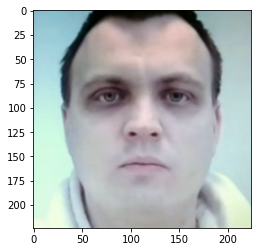

In [41]:
import cv2
import matplotlib.pyplot as plt

# Get a single image from the dataset
image_path   = '/home/air/Spoof/Implementation-patchnet/images/LCC_FASD/LCC_FASD_development/spoof/FT720P_G780_REDMI4X_id0_s0_15.png'

image = get_single_image_x(image_path)

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

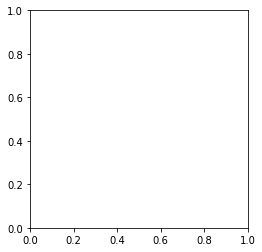

: 

In [43]:
import cv2
import matplotlib.pyplot as plt

# Get a single image from the dataset
image_path   = '/home/air/Spoof/Implementation-patchnet/images/LCC_FASD/LCC_FASD_development/spoof/FT720P_G780_REDMI4X_id0_s0_15.png'

image = get_single_image_x_RGB(image_path)

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.show()